In [1]:
import sys
#sys.path.insert(0, '/Users/qd/PycharmProjects/rydanalysis/')
from rydanalysis import *
import matplotlib.pyplot as plt
import importlib
#path='/run/user/1000/gvfs/smb-share:server=axion.local,share=rydberg/data/2020_02_12/EIT_resonancescan'
import seaborn as sns
from pathlib import Path
sns.set_style("dark")
sns.set_style("darkgrid")
import matplotlib as mpl
path='/Users/qd/Desktop/DATA/01_Twolevel_versus_Threelevel_pABSx0-8_pBlue15mV/'
path = Path(path)

In [2]:
seq = rydanalysis.OldStructure(path)
#seq.path='/Users/qd/Schreibtisch/DATA/'

'raw_data.h5' already exists. Do you want to load from this file (Y) or from the old folder structure (N)? [Y/n]: 

In [3]:
seq.save_raw_data()

C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


250
250


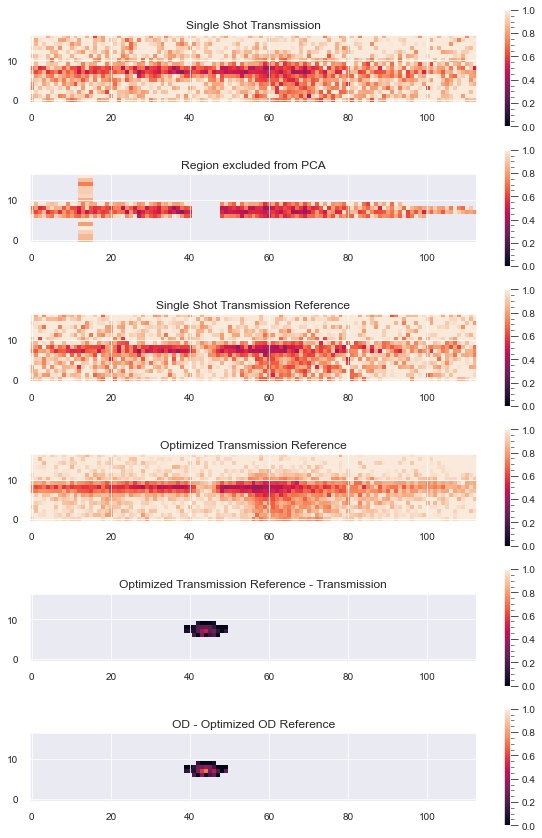

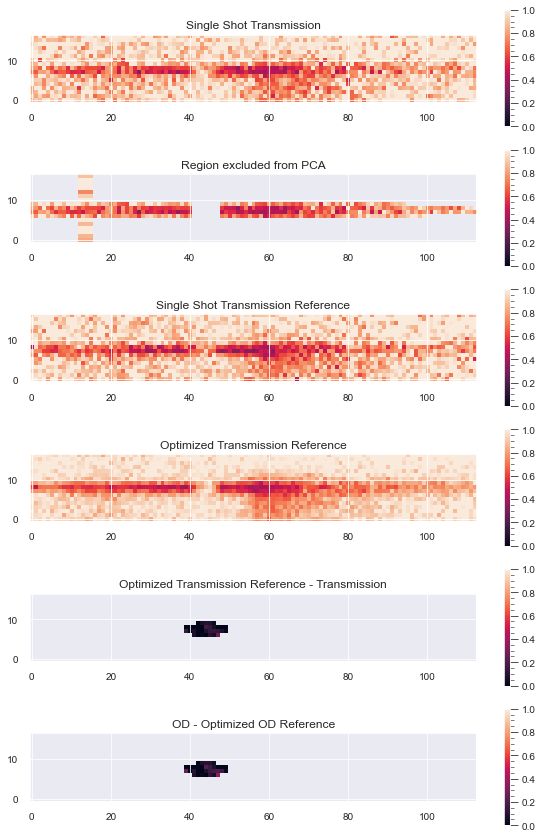

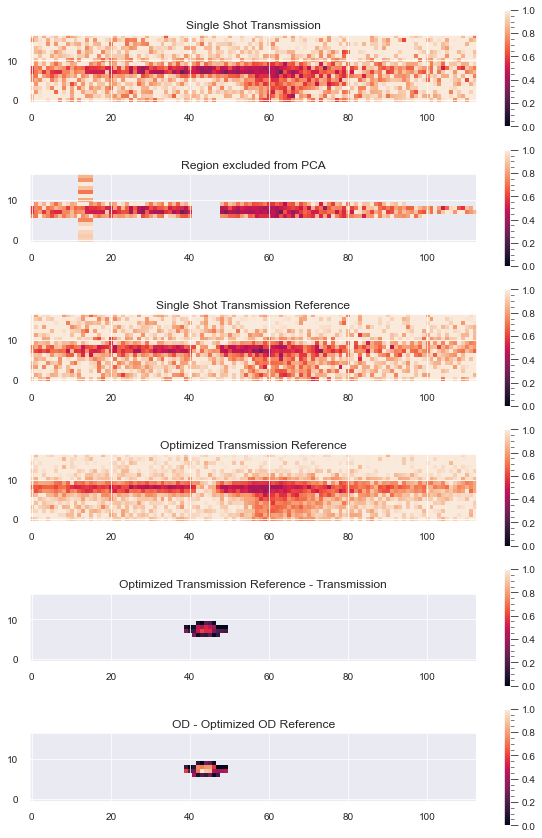

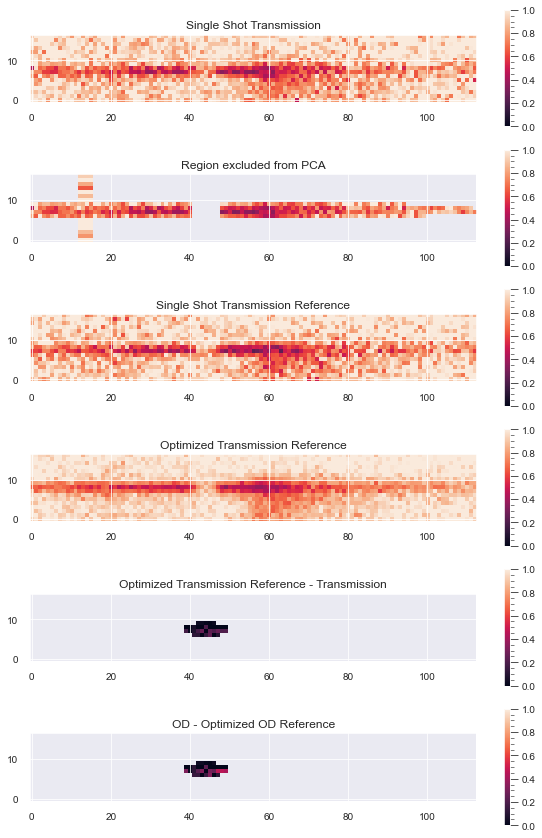

In [68]:
importlib.reload(rydanalysis)
from rydanalysis import *
data = seq.raw_data#.groupby('Test1').mean()

#mask = (abs(images.x)) * (abs(images.y))
#image = images.image_01.sel(dDDSred=0, method='nearest').where(mask)/images.image_03.sel(dDDSred=0, method='nearest').where(mask)#-images.image_05.sel(dDDSred=0, method='nearest').where(mask)
two_level=EITMask(image = data.image_01).get_mask(center_x=12,center_y=-168,width_x=20,width_y=600,width_eit=30)
roi=EllipticalMask(image = data.image_01).get_mask(center_x=12,center_y=-168,width_x=15,width_y=50)
elliptical=EllipticalMask(image = data.image_01).get_mask(center_x=-20,center_y=-100,width_x=60,width_y=1000)

crop = RectangularMask(image = data.image_01).get_mask(center_x=18,center_y=-175, width_x=70, width_y=600)

IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=two_level,crop_mask=crop,
                                             absorption_ref_kwargs=dict(Test1=1),
                                             pca_kwargs=dict(n_components=250))
#AI=AbsorptionImaging.from_raw_data(seq.raw_data,crop_mask=crop)

#print(absorptionpic.calculate_density(images.image_01.sel(tEXC=0, method='nearest')))
#print(center_of_mass(imag[n].where(eit_roi)))

trans=IEI.transmission
deltatrans=IEI.delta_transmission
deltaod=IEI.delta_optical_depth
ref=IEI.transmission_reference
opt_ref=IEI.optimized_transmission_reference(IEI.transmission)
single=IEI.absorption_images

#AIimag=AI.transmission

for n in range(1,5):

    fig,ax = plt.subplots(6,figsize=(10,15))
    pic=0
    #ax[0].set_title('Absorption / Light Reference')
    #ax[0].imshow(AIimag[n].where(elliptical), origin='bottom',vmin=0, vmax=1)
    #fig.colorbar(ax[0].imshow(AIimag[n].where(elliptical), origin='bottom',vmin=0, vmax=1),ax=ax[0])
    ax[pic].set_title('Single Shot Transmission')
    ax[pic].imshow(trans[n], origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[pic].imshow(trans[n], origin='bottom',vmin=0, vmax=1),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Region excluded from PCA')
    ax[pic].imshow(trans[n][n].where(two_level), origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[pic].imshow(trans[n].where(two_level), origin='bottom',vmin=0, vmax=1),ax=ax[pic])
    pic+=1
    #ax[2].set_title('Single Shot Absorption')
    #ax[2].imshow(single[n], origin='bottom',vmin=40, vmax=150)
    #fig.colorbar(ax[2].imshow(single[n], origin='bottom',vmin=40, vmax=150),ax=ax[2])
    ax[pic].set_title('Single Shot Transmission Reference')
    ax[pic].imshow(ref[n], origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[pic].imshow(ref[n], origin='bottom',vmin=0, vmax=1),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Optimized Transmission Reference')
    ax[pic].imshow(opt_ref[n], origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[pic].imshow(opt_ref[n], origin='bottom',vmin=0, vmax=1),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Optimized Transmission Reference - Transmission')
    ax[pic].imshow(deltatrans[n].where(roi), origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[pic].imshow(deltatrans[n].where(roi), origin='bottom',vmin=0, vmax=1),ax=ax[pic])
    pic+=1
    ax[pic].set_title('OD - Optimized OD Reference')
    ax[pic].imshow(deltaod[n].where(roi), origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[pic].imshow(deltaod[n].where(roi), origin='bottom',vmin=0, vmax=1),ax=ax[pic])
    plt.show()

-1
0


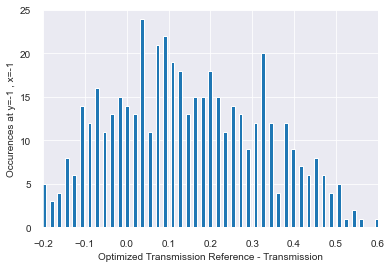

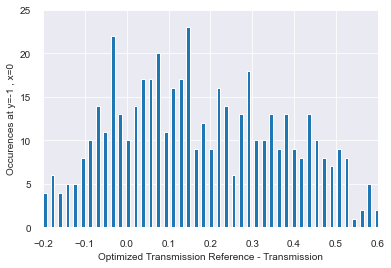

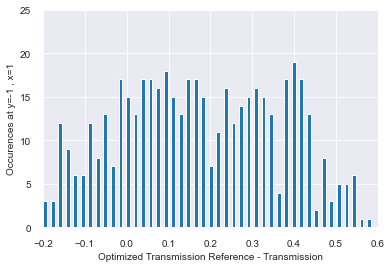

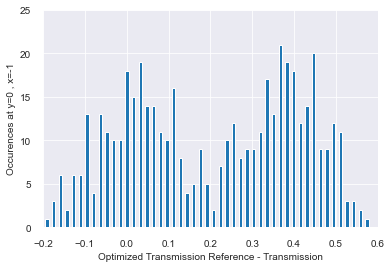

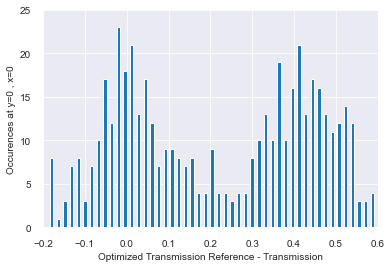

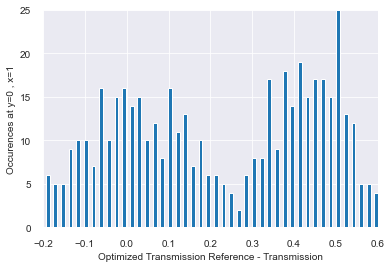

In [69]:
for y in range(-1,1):
    print(y)
    for x in range(-1,2):
        delta_t_list=[]
        for n in range(0,500):
            delta_t_list.append(deltatrans[n].where(roi)[8+y,43+x])
        try:
            plt.hist(delta_t_list, bins=60,rwidth=0.5,align='right')
            plt.ylabel('Occurences at y=%.0f , x=%.0f' %(y,x))
            plt.xlim(-0.2,0.6)
            plt.ylim(0,25)
            plt.xlabel('Optimized Transmission Reference - Transmission')
            plt.show()
        except:
            print('Out of ROI')
